In [9]:
import keras
import tensorflow
from matplotlib import pyplot

from keras.datasets import mnist

In [18]:
# Load the data and split it between train and test sets
(train_X, train_y), (test_X, test_y) = mnist.load_data()

In [8]:
#Test the shapes are as expected by printing to screen

print('X_train: ' + str(train_X.shape))
print('Y_train: ' + str(train_y.shape))
print('X_test:  '  + str(test_X.shape))
print('Y_test:  '  + str(test_y.shape))

X_train: (60000, 28, 28)
Y_train: (60000,)
X_test:  (10000, 28, 28)
Y_test:  (10000,)


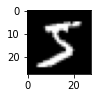

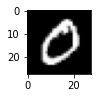

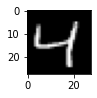

In [17]:
from matplotlib import pyplot
for i in range(3):  
    pyplot.subplot(330 + 1 + i)
    pyplot.imshow(train_X[i], cmap=pyplot.get_cmap('gray'))
    pyplot.show()

In [ ]:
num_classes = 10  #one for each digit 0 to 9
input_shape = (28, 28, 1) #size of the image. 28 x 28 pixels in 1 dimension (e.g. an RGB image would be 28,28,3)


In [ ]:
#Normalise the images. Scale the greyscale values 0-255, to 0-1
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255